First 5 rows of dataset:
   ï»¿Row ID         Order ID  Order Date   Ship Date     Ship Mode  \
0      32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day   
1      26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class   
2      25330    IN-2013-71249  17-10-2013  18-10-2013   First Class   
3      13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class   
4      47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day   

  Customer ID     Customer Name      Segment           City            State  \
0    RH-19495       Rick Hansen     Consumer  New York City         New York   
1    JR-16210     Justin Ritter    Corporate     Wollongong  New South Wales   
2    CR-12730      Craig Reiter     Consumer       Brisbane       Queensland   
3    KM-16375  Katherine Murray  Home Office         Berlin           Berlin   
4     RH-9495       Rick Hansen     Consumer          Dakar            Dakar   

   ...        Product ID    Category Sub-Category  \
0  ...   TEC-A

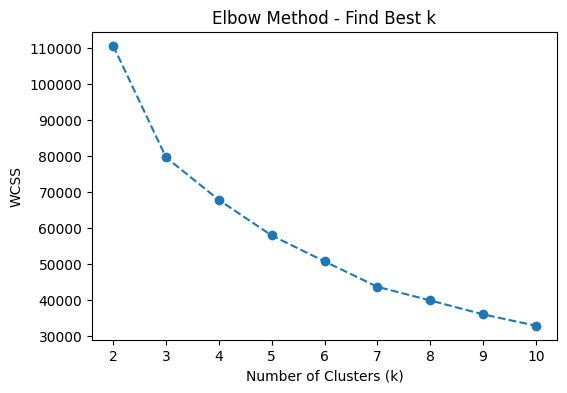


Silhouette Scores for different k:
k=2: 0.553
k=3: 0.507
k=4: 0.519
k=5: 0.521
k=6: 0.439
k=7: 0.446
k=8: 0.450
k=9: 0.455
k=10: 0.402

Clustered Dataset Preview:
   ï»¿Row ID         Order ID  Order Date   Ship Date     Ship Mode  \
0      32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day   
1      26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class   
2      25330    IN-2013-71249  17-10-2013  18-10-2013   First Class   
3      13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class   
4      47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day   

  Customer ID     Customer Name      Segment           City            State  \
0    RH-19495       Rick Hansen     Consumer  New York City         New York   
1    JR-16210     Justin Ritter    Corporate     Wollongong  New South Wales   
2    CR-12730      Craig Reiter     Consumer       Brisbane       Queensland   
3    KM-16375  Katherine Murray  Home Office         Berlin           Berlin   
4     RH-

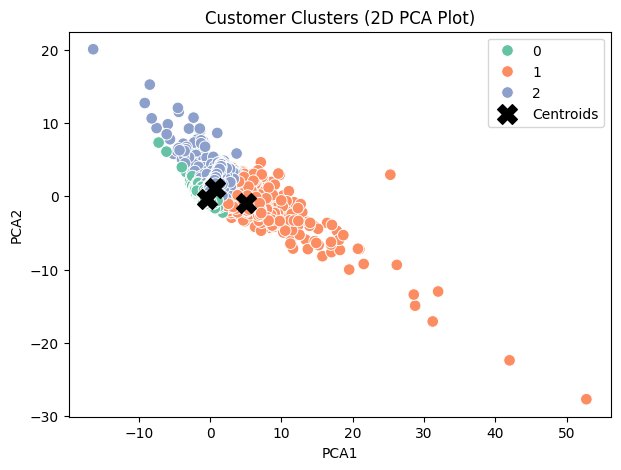

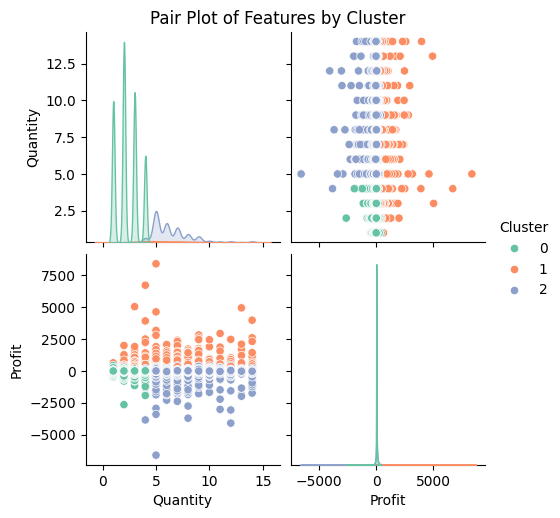

In [ ]:


# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Step 2: Load and Inspect Datase
df = pd.read_csv("/content/drive/MyDrive/GlobalSuperstore Data.csv", encoding='latin-1')

print("First 5 rows of dataset:")
print(df.head())
print("\nShape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())


# Step 3: Data Preprocessing (Scaling)

features = ["Sales", "Quantity", "Profit"]
X = df[features].copy()
X['Sales'] = X['Sales'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
X['Sales'] = pd.to_numeric(X['Sales'])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Elbow Method

wcss = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

# Plot Elbow Method
plt.figure(figsize=(6,4))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.title("Elbow Method - Find Best k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

print("\nSilhouette Scores for different k:")
for k, s in zip(K_range, sil_scores):
    print(f"k={k}: {s:.3f}")

#  Apply K-Means

k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print("\nClustered Dataset Preview:")
print(df.head())
df.to_csv("customer_data_clustered.csv", index=False)
print("\n Clustered dataset saved as 'customer_data_clustered.csv'")


#  Visualizations


# Scatter Plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = X_pca[:,0], X_pca[:,1]

plt.figure(figsize=(7,5))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="Set2", s=70)
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], c="black", marker="X", s=200, label="Centroids")
plt.title("Customer Clusters (2D PCA Plot)")
plt.legend()
plt.show()

# Pair Plot

pairplot_cols = features + ["Cluster"]
if all(col in df.columns for col in pairplot_cols):
    sns.pairplot(df[pairplot_cols], hue="Cluster", palette="Set2", diag_kind="kde")
    plt.suptitle("Pair Plot of Features by Cluster", y=1.02)
    plt.show()
else:
    print(f"\nSkipping Pair Plot: Not all required columns {pairplot_cols} are in the DataFrame.")






